# Cervical cancer prediction

The aim of this project was to predict whether a patient's biopsy was positive for cervical cancer based on demographic information, habits, and historic medical records through the training of a few ML classification models and a Neural Network.
&nbsp;

The dataset is publicly available at UCI Machine Learning Repository and it was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. It contains 858 patient's information and several patients decided not to answer some of the questions because of privacy concerns (missing values).
&nbsp;

Although it is the most preventable type of cancer, each year cervical cancer kills about 4,000 women in the U.S. and about 300,000 women worldwide.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-1.-Exploratory-data-analysis-" data-toc-modified-id="-1.-Exploratory-data-analysis--1"><span style="color: steelblue"> 1. Exploratory data analysis </span></a></span></li><li><span><a href="#-2.-Data-preprocessing-" data-toc-modified-id="-2.-Data-preprocessing--2"><span style="color: steelblue"> 2. Data preprocessing </span></a></span></li><li><span><a href="#-3.-Model-fitting-" data-toc-modified-id="-3.-Model-fitting--3"><span style="color: steelblue"> 3. Model fitting </span></a></span></li></ul></div>

In [60]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
warnings.filterwarnings("ignore")
import tensorflow as tf
import keras as keras
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz

## <span style='color:steelblue'> 1. Exploratory data analysis </span>

In [51]:
cervical_cancer = pd.read_csv("risk_factors_cervical_cancer.csv")

First, some data cleaning was necessary due to the missing values aforementioned.

In [52]:
cervical_cancer = cervical_cancer.drop("STDs: Time since first diagnosis", 1)
cervical_cancer = cervical_cancer.drop("STDs: Time since last diagnosis", 1)

In [53]:
cervical_cancer = cervical_cancer.replace('?',np.NaN)

In [54]:
cervical_cancer = cervical_cancer.dropna()  # all missing values elimination

Then, upon a general exploration of the data it can be observed (below) that there was 668 rows of 34 columns left.

In [37]:
cervical_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 668 non-null    int64 
 1   Number of sexual partners           668 non-null    object
 2   First sexual intercourse            668 non-null    object
 3   Num of pregnancies                  668 non-null    object
 4   Smokes                              668 non-null    object
 5   Smokes (years)                      668 non-null    object
 6   Smokes (packs/year)                 668 non-null    object
 7   Hormonal Contraceptives             668 non-null    object
 8   Hormonal Contraceptives (years)     668 non-null    object
 9   IUD                                 668 non-null    object
 10  IUD (years)                         668 non-null    object
 11  STDs                                668 non-null    object

In [38]:
pd.set_option('display.max_columns', None)  
cervical_cancer.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [18]:
list(cervical_cancer.columns)

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

&nbsp;

**Dataset description**
&nbsp;

Most of the columns are self explanatory, they are also binary (0 = 'No' and 1 = 'Yes') except the ones indicating the 'number of years'. The Dx columns towards the end refer to possible previous disease diagnoses and the 'Hinselmann', 'Schiller', and 'Citology' columns refer to tests to determine presence of precancerous conditions. The outcome variable is **'Biopsy'**, indicating whether it is positive (presence of cancer) or not. 

&nbsp;



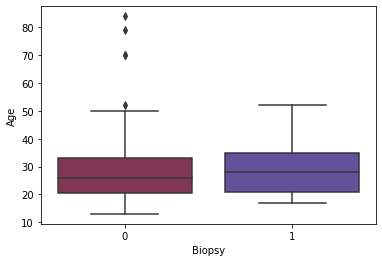

In [28]:
# Boxplot of diagnosis distribution by age

sns.boxplot(data = cervical_cancer, x = 'Biopsy', y = 'Age', palette = 'twilight_r')

plt.show()

It can be observed in the boxplot above that most of the patients with a positive biopsy in this case are in an age range of around 25 to 35 years old.

&nbsp;



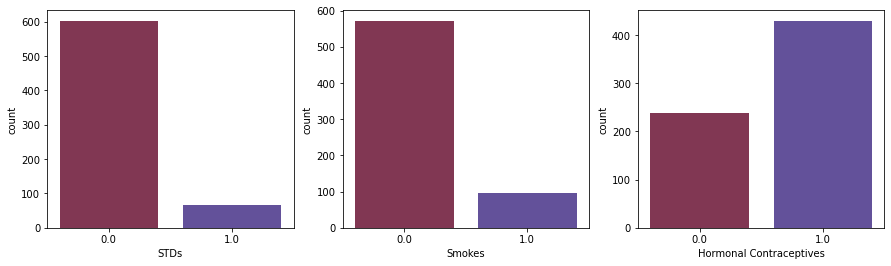

In [30]:
# Countplots of risk factors

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,4))

sns.countplot(data = cervical_cancer, x = 'STDs', palette = 'twilight_r', ax=axes[0])
sns.countplot(data = cervical_cancer, x = 'Smokes', palette = 'twilight_r', ax=axes[1])
sns.countplot(data = cervical_cancer, x = 'Hormonal Contraceptives', palette = 'twilight_r', ax=axes[2])

plt.show()

The plot above shows the distributions of some of the most significant risk factors for cervical cancer (according to the dataset's description). HPV is also an important risk factor, however, there was very few ocurrences on this dataset. Analysis' important features were later elucidated by plotting the best performing model. 

&nbsp;


## <span style='color:steelblue'> 2. Data preprocessing </span>

All the necessary preprocessing steps for machine learning were followed below. A matrix of features and dependent variable vector were created. The dataset was split into train and test sets and feature scaling for the non binary columns was performed.

In [55]:
# Creating the matrix of features and dependent variable vector 

X = cervical_cancer.loc[:, cervical_cancer.columns != 'Biopsy']
y = cervical_cancer.loc[:, 'Biopsy']

In [56]:
# Data set splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [57]:
# Feature scaling 

sc = StandardScaler()
X_train.iloc[:,[0,1,2,3,5,6,8,10,12,25]] = sc.fit_transform(X_train.iloc[:,[0,1,2,3,5,6,8,10,12,25]])
X_test.iloc[:,[0,1,2,3,5,6,8,10,12,25]] = sc.transform(X_test.iloc[:,[0,1,2,3,5,6,8,10,12,25]])

## <span style='color:steelblue'> 3. Model fitting </span> 

The following classification models were fit:

- Logistic Regression: which combines the input values linearly using weights or coefficient values to predict the output binary value. 

&nbsp;

- K-nearest Neighbors: which works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification).

&nbsp;

- Support Vector Classifier: which uses a technique called the kernel trick to transform the data and then based on these transformations it finds an optimal boundary between the possible outputs.

In [62]:
# Logistic Regression

log_class = LogisticRegression()
log_class.fit(X_train, y_train)  # fit

log_ypred = log_class.predict(X_test)  # computing predictions
print('Test Accuracy: %.3f' % log_class.score(X_test, y_test)) # accuracy

# k-fold cross validation and performance report
scores = cross_val_score(log_class, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
print('Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Test Accuracy: 0.948
Accuracy: 0.940 +/- 0.018


In [64]:
# K nearest neighbors

knn_class = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_class.fit(X_train, y_train)  # fit

knn_ypred = knn_class.predict(X_test)  # computing predictions
print('Test Accuracy: %.3f' % knn_class.score(X_test, y_test)) # accuracy

# Cross validation and performance report
scores = cross_val_score(knn_class, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
print('Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Test Accuracy: 0.948
Accuracy: 0.929 +/- 0.016


In [63]:
# Support vector machine

sv_class = svm.SVC(kernel = 'linear', random_state = 0)
sv_class.fit(X_train, y_train)

svc_ypred = sv_class.predict(X_test)  #computing predictions
print('Test Accuracy: %.3f' % sv_class.score(X_test, y_test)) # accuracy

# Cross validation and performance report
scores = cross_val_score(sv_class, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
print('Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Test Accuracy: 0.940
Accuracy: 0.961 +/- 0.024


&nbsp;

The 3 models appear to have achieved a similar accuracy, with the SVC being the higest one. However, to further investigate the model's performance their ROC curve and AUC score was plotted below.

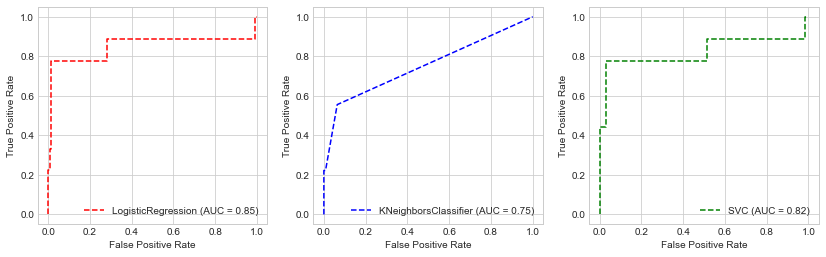

In [47]:
# ROC Curves

plt.style.use('seaborn-whitegrid')
fig, [ax_log, ax_knn, ax_svc] = plt.subplots(1, 3, figsize=(14, 4))
ax_log = metrics.plot_roc_curve(log_class, X_test, y_test, ax=ax_log, linestyle='--', color='r')
ax_knn = metrics.plot_roc_curve(knn_class, X_test, y_test, ax=ax_knn, linestyle='--', color='b')
ax_svc = metrics.plot_roc_curve(sv_class, X_test, y_test, ax=ax_svc, linestyle='--', color='g')


plt.show()

The accuracy is simply the proportion of true positives and negatives in the whole data set. Whereas,  AUC measures how true positive rate (recall) and false positive rate trade off (so it indicates how much the model is capable of distinguishing between classes). Logistic Regression obtained the largest AUC (0.85). It is important to note that in a real medical setting there is a high cost of non detection of a true positive, so the sensitivity (True Positive Rate) should be optimized as much as possible. 

&nbsp;

Below, feature importance of the Logistic Regression model was plotted. It can be observed that in this analysis among the most important risk factors for prediction are the precancerous conditions tests, previous diagnoses, smoking and some STDs.

Text(0.5, 0, 'Importance')

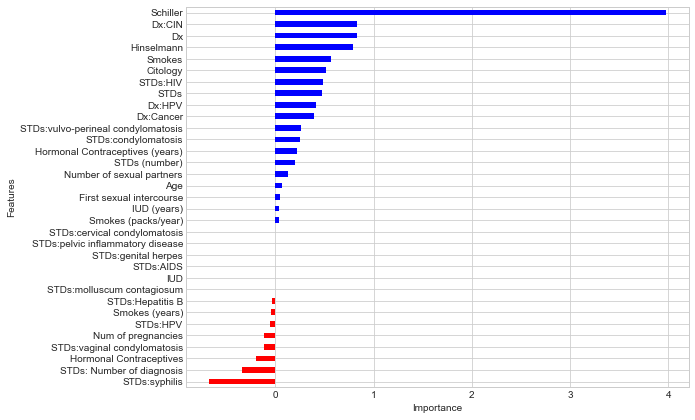

In [49]:
# Logistic regression feature importance plot

coeff = list(log_class.coef_[0])
labels = list(X_train.columns)
 
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(9, 7),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

&nbsp;



A Neural Network was also implemented for cancer prediction.

Neural networks group unlabeled data according to similarities among the inputs.They are trained by adjusting neuron input weights based on the network's performance on example inputs. If the network classifies an instance correctly, weights contributing to the correct answer are increased, while other weights are decreased. The application of NNs for medical science  is a growing area with great potential to obtain predictions about many diseases, not only cancer.

In [117]:
# Initializing the Neural Network
ann = tf.keras.models.Sequential()

In [118]:
# Input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [119]:
# Second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [120]:
# Output layer 
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [121]:
# Compiling 
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [122]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [123]:
# Training
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 1ms/step - loss: 0.8882 - accuracy: 0.2466
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 0.8143 - accuracy: 0.3928
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5949
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.7885
Epoch 5/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5857 - accuracy: 0.8766
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 0.5408 - accuracy: 0.8749
Epoch 7/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.9109
Epoch 8/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.9309
Epoch 9/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.9400
Epoch 10/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.9185
Epoch 11/

&nbsp;

The highest accuracy the NN yielded was ~ 0.9902.

&nbsp;

In [41]:
# NN summary

print(ann.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 204       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# NN visualization

ann_viz(ann, title="Cervical cancer prediction neural network")

<img src="../img/network.gv-1.png">
